<a href="https://colab.research.google.com/github/marcosmota/olist-analysis-sentiment/blob/master/notebooks/preprocessing-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from argparse import Namespace


from source.data.load_data import clear_data, load_from_file


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


PROJECT_ID = 'ai-plataform'
BUCKET_NAME = "olist-analysis-sentiment"


In [17]:
args = Namespace(
    dataset_csv = 'https://raw.githubusercontent.com/MarcosMota/AnaliseDeSentimento/master/dataset/olist_order_reviews_dataset.csv',
    train_split = 0.8,
    random_state = 42,
    vocab_size = 10000,
    embedding_dim = 16,
    max_length = 120,
    batch_size=128,
    num_epochs=5,
    early_stopping_criteria=2,
    dropout_p=0.3,
    model_storage="model_storage/lstm",
)

In [18]:
df = load_from_file(
    args.dataset_csv,
    clear_fn = clear_data(
        column_text='review_comment_message',
        column_label='review_score'))
df.head()

,text,label
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,1
9,aparelho eficiente. no site a marca do aparelh...,1
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
15,"Vendedor confiável, produto ok e entrega antes...",1


## Distribuition by label

We can see that distribution of labels it's skewed, contains more positive observations instead of observation negative. Given to that, we need pay attention 

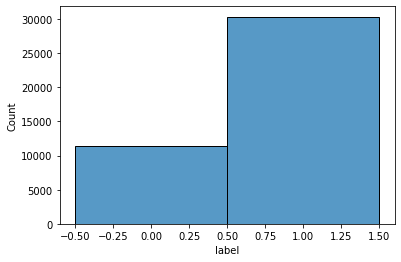

In [21]:
sns.histplot(data=df, x="label")